In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [68]:
#importing data
species = pd.read_csv("species.csv")
bryce = pd.read_csv("bryce.csv")
smoky = pd.read_csv("smoky.csv")
yellowstone = pd.read_csv("yellowstone.csv")
yosemite = pd.read_csv("yosemite.csv")

#splitting into animals vs plants
bryce_plants = bryce[(bryce.category == "Vascular Plant") | (bryce.category == "Nonvascular Plant")]
bryce_animals= bryce[(bryce.category != "Vascular Plant") & (bryce.category != "Nonvascular Plant")]


smoky_plants = smoky[(smoky.category == "Vascular Plant") | (smoky.category == "Nonvascular Plant")]
smoky_animals= smoky[(smoky.category != "Vascular Plant") & (smoky.category != "Nonvascular Plant")]


yellowstone_plants = yellowstone[(yellowstone.category == "Vascular Plant") | (yellowstone.category == "Nonvascular Plant")]
yellowstone_animals= yellowstone[(yellowstone.category != "Vascular Plant") & (yellowstone.category != "Nonvascular Plant")]


yosemite_plants = yosemite[(yosemite.category == "Vascular Plant") | (yosemite.category == "Nonvascular Plant")]
yosemite_animals= yosemite[(yosemite.category != "Vascular Plant") & (yosemite.category != "Nonvascular Plant")]



In [72]:
#splitting species into plants and animals

species_plants = species[(species.category == "Vascular Plant") | (species.category == "Nonvascular Plant")]
species_animals= species[(species.category != "Vascular Plant") & (species.category != "Nonvascular Plant")]

print(species_plants.describe())
print("----------------------------------------------------------------------------")
print(species_animals.describe())
print("----------------------------------------------------------------------------")
print(species_plants["conservation_status"].value_counts())
print("----------------------------------------------------------------------------")
print(species_animals["conservation_status"].value_counts())

              category       scientific_name        common_names  \
count             4803                  4803                4803   
unique               2                  4595                4537   
top     Vascular Plant  Hypochaeris radicata  Brachythecium Moss   
freq              4470                     3                   7   

       conservation_status  
count                 4803  
unique                   4  
top                   Safe  
freq                  4752  
----------------------------------------------------------------------------
       category scientific_name        common_names conservation_status
count      1021            1021                1021                1021
unique        5             946                 967                   5
top        Bird   Puma concolor  Brewster's Warbler                Safe
freq        521               3                   3                 881
----------------------------------------------------------------------------


In [107]:
en_plant = species_plants[(species_plants.conservation_status == "Endangered")]

th_plant =species_plants[(species_plants.conservation_status == "Threatened")]

con_plant= species_plants[(species_plants.conservation_status == "Species of Concern")]

print(th_plant)

            category      scientific_name           common_names  \
704   Vascular Plant  Isotria medeoloides  Small Whorled Pogonia   
2562  Vascular Plant   Spiraea virginiana       Virginia Spiraea   

     conservation_status  
704           Threatened  
2562          Threatened  


In [108]:
conserve = np.unique(species["conservation_status"])
print(conserve)

category = np.unique(species["category"])
print(category)

['Endangered' 'In Recovery' 'Safe' 'Species of Concern' 'Threatened']
['Amphibian' 'Bird' 'Fish' 'Mammal' 'Nonvascular Plant' 'Reptile'
 'Vascular Plant']


In [116]:
en_animal = species_animals[(species_animals.conservation_status == "Endangered")]
th_animal = species_animals[(species_animals.conservation_status == "Threatened")]
con_animal = species_animals[(species_animals.conservation_status == "Species of Concern")]
rec_animal = species_animals[(species_animals.conservation_status == "In Recovery")]

print(en_animal)

       category               scientific_name  \
8        Mammal                   Canis lupus   
9        Mammal                   Canis rufus   
34       Mammal             Myotis grisescens   
39       Mammal                Myotis sodalis   
72       Mammal  Glaucomys sabrinus coloratus   
173        Bird                Grus americana   
276        Bird           Vermivora bachmanii   
343        Bird             Picoides borealis   
540        Fish          Etheostoma percnurum   
570        Fish               Noturus baileyi   
3275       Fish             Chasmistes liorus   
4446     Mammal       Ovis canadensis sierrae   
4448     Mammal                   Canis lupus   
4505       Bird       Gymnogyps californianus   
4601  Amphibian                  Rana sierrae   

                                           common_names conservation_status  
8                                             Gray Wolf          Endangered  
9                                              Red Wolf    

In [69]:
#PLANT info bryce
print("All Bryce Plants:")
print(bryce_plants.describe())
print(bryce_plants["observations"].sum())
print("----------------------")
bryce_plants_en =bryce_plants[(bryce_plants.conservation_status == "Endangered")]
print("Endangered Bryce Plants:")
print(bryce_plants_en.describe())
print(bryce_plants_en["observations"].sum())
print("----------------------")
bryce_plants_th = bryce_plants[(bryce_plants.conservation_status == "Threatened")]
print("Threatened Bryce Plants:")
print(bryce_plants_th.describe())
print(bryce_plants_th["observations"].sum())
print("----------------------")
bryce_plants_con = bryce_plants[(bryce_plants.conservation_status == "Species of Concern")]
print("Species of Concern Bryce Plants:")
print(bryce_plants_con.describe())
print(bryce_plants_con["observations"].sum())
print("----------------------")
#no species of plant in recovery

All Bryce Plants:
       observations
count   4803.000000
mean      99.120341
std       20.472930
min        9.000000
25%       85.000000
50%       99.000000
75%      113.000000
max      176.000000
476075
----------------------
Endangered Bryce Plants:
       observations
count           1.0
mean           25.0
std             NaN
min            25.0
25%            25.0
50%            25.0
75%            25.0
max            25.0
25
----------------------
Threatened Bryce Plants:
       observations
count      2.000000
mean      49.500000
std       10.606602
min       42.000000
25%       45.750000
50%       49.500000
75%       53.250000
max       57.000000
99
----------------------
Species of Concern Bryce Plants:
       observations
count     48.000000
mean      95.000000
std       19.279578
min       49.000000
25%       84.000000
50%       95.500000
75%      107.250000
max      135.000000
4560
----------------------
In Recovery Bryce Plants:
       observations
count           0.0
mea

In [70]:
#Plant info smoky
print("All Smoky Plants:")
print(smoky_plants.describe())
print(smoky_plants["observations"].sum())
print("----------------------")
smoky_plants_en =smoky_plants[(smoky_plants.conservation_status == "Endangered")]
print("Endangered Smoky Plants:")
print(smoky_plants_en.describe())
print(smoky_plants_en["observations"].sum())
print("----------------------")
smoky_plants_th = smoky_plants[(smoky_plants.conservation_status == "Threatened")]
print("Threatened Smoky Plants:")
print(smoky_plants_th.describe())
print(smoky_plants_th["observations"].sum())
print("----------------------")
smoky_plants_con = smoky_plants[(smoky_plants.conservation_status == "Species of Concern")]
print("Species of Concern Smoky Plants:")
print(smoky_plants_con.describe())
print(smoky_plants_con["observations"].sum())
print("----------------------")
#no species of plant in recovery

All Smoky Plants:
       observations
count   4803.000000
mean      74.635853
std       20.015186
min       10.000000
25%       61.000000
50%       75.000000
75%       88.000000
max      147.000000
358476
----------------------
Endangered Smoky Plants:
       observations
count           1.0
mean           27.0
std             NaN
min            27.0
25%            27.0
50%            27.0
75%            27.0
max            27.0
27
----------------------
Threatened Smoky Plants:
       observations
count      2.000000
mean      40.500000
std        6.363961
min       36.000000
25%       38.250000
50%       40.500000
75%       42.750000
max       45.000000
81
----------------------
Species of Concern Smoky Plants:
       observations
count     48.000000
mean      66.979167
std       18.942791
min       26.000000
25%       57.250000
50%       68.000000
75%       81.500000
max      108.000000
3215
----------------------
In Recovery Smoky Plants:
       observations
count           0.0
mea

In [90]:
#Plant info yellowstone
print("All Yellowstone Plants:")
print(yellowstone_plants.describe())
print(yellowstone_plants["observations"].sum())
print("----------------------")
yellowstone_plants_en =yellowstone_plants[(yellowstone_plants.conservation_status == "Endangered")]
print("Endangered Yellowstone Plants:")
print(yellowstone_plants_en.describe())
print(yellowstone_plants_en["observations"].sum())
print("----------------------")
yellowstone_plants_th = yellowstone_plants[(yellowstone_plants.conservation_status == "Threatened")]
print("Threatened Yellowstone Plants:")
print(yellowstone_plants_th.describe())
print(yellowstone_plants_th["observations"].sum())
print("----------------------")
yellowstone_plants_con = yellowstone_plants[(yellowstone_plants.conservation_status == "Species of Concern")]
print("Species of Concern Yellowstone Plants:")
print(yellowstone_plants_con.describe())
print(yellowstone_plants_con["observations"].sum())
print("----------------------")
#no species of plant in recovery

All Yellowstone Plants:
       observations
count   4803.000000
mean     249.000208
std       20.289928
min       63.000000
25%      236.000000
50%      249.000000
75%      263.000000
max      321.000000
1195948
----------------------
Endangered Yellowstone Plants:
       observations
count           1.0
mean           63.0
std             NaN
min            63.0
25%            63.0
50%            63.0
75%            63.0
max            63.0
63
----------------------
Threatened Yellowstone Plants:
       observations
count           2.0
mean          114.0
std             0.0
min           114.0
25%           114.0
50%           114.0
75%           114.0
max           114.0
228
----------------------
Species of Concern Yellowstone Plants:
       observations
count     48.000000
mean     220.708333
std       18.950056
min      181.000000
25%      211.000000
50%      218.500000
75%      231.000000
max      268.000000
10594
----------------------


In [74]:
#Plant info yosemite
print("All Yosemite Plants:")
print(yosemite_plants.describe())
print(yosemite_plants["observations"].sum())
print("----------------------")
yosemite_plants_en =yosemite_plants[(yosemite_plants.conservation_status == "Endangered")]
print("Endangered Yosemite Plants:")
print(yosemite_plants_en.describe())
print(yosemite_plants_en["observations"].sum())
print("----------------------")
yosemite_plants_th = yosemite_plants[(yosemite_plants.conservation_status == "Threatened")]
print("Threatened Yosemite Plants:")
print(yosemite_plants_th.describe())
print(yosemite_plants_th["observations"].sum())
print("----------------------")
yosemite_plants_con = yosemite_plants[(yosemite_plants.conservation_status == "Species of Concern")]
print("Species of Concern Yosemite Plants:")
print(yosemite_plants_con.describe())
print(yosemite_plants_con["observations"].sum())
print("----------------------")
#no species of plant in recovery

All Yosemite Plants:
       observations
count   4803.000000
mean     148.916094
std       20.164583
min       47.000000
25%      135.000000
50%      149.000000
75%      163.000000
max      223.000000
715244
----------------------
Endangered Yosemite Plants:
       observations
count           1.0
mean           47.0
std             NaN
min            47.0
25%            47.0
50%            47.0
75%            47.0
max            47.0
47
----------------------
Threatened Yosemite Plants:
       observations
count      2.000000
mean      72.000000
std       14.142136
min       62.000000
25%       67.000000
50%       72.000000
75%       77.000000
max       82.000000
144
----------------------
Species of Concern Yosemite Plants:
       observations
count     48.000000
mean     134.812500
std       15.371508
min       99.000000
25%      125.750000
50%      134.500000
75%      143.750000
max      169.000000
6471
----------------------


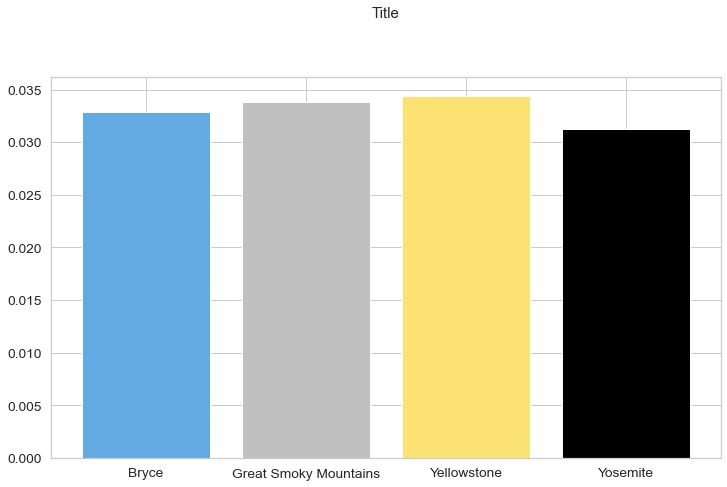

In [43]:
#proportions PLANTS

#x = parklist which is already defined
threatened_proplist = [br_th, sm_th, ye_th, yo_th]



sns.set(font_scale = 1.25)
sns.set_style("whitegrid")
plt.figure(figsize=(12,7))
ax = plt.bar(parklist, threatened_proplist, color=["#62abe2", "silver","#fce273", "#000000" ])
plt.title("Title", pad = 60)
plt.show()

In [46]:
print(categorylist)

['Amphibian' 'Bird' 'Fish' 'Mammal' 'Nonvascular Plant' 'Reptile'
 'Vascular Plant']


In [50]:
print(species["category"].value_counts())
print(len(species))

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64
5824


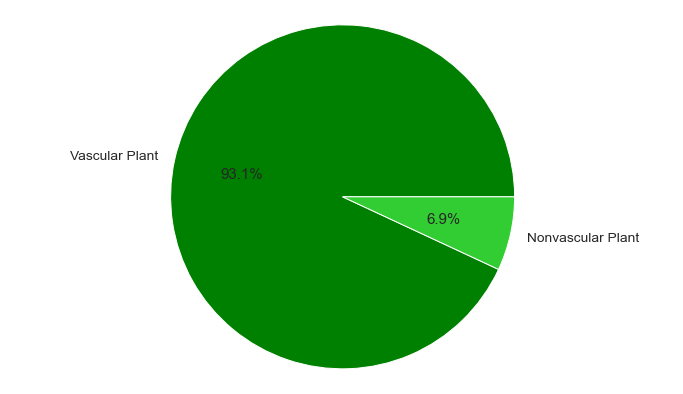

In [62]:
#piechart for plants
plantlabels = ["Vascular Plant", "Nonvascular Plant"]
plantcounts=[4470, 333]


plt.figure(figsize =(12,7))
plt.pie(plantcounts, labels = plantlabels, autopct = "%0.1f%%", colors = ["green", "limegreen"])
plt.axis("equal")
plt.show()

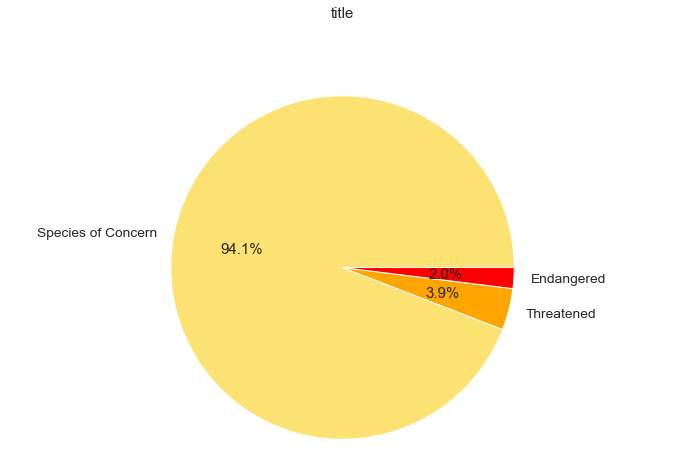

In [99]:
plants = species[(species.category == "Vascular Plant") | (species.category == "Nonvascular Plant")]

plant_categories = plants["conservation_status"]

plant_counts_interest = [48, 2, 1]
plant_labels = ["Species of Concern", "Threatened", "Endangered"]

plt.figure(figsize=(12,7))
plt.pie(plant_counts, labels = plant_labels, autopct = "%0.1f%%", colors = ["#fce273", "orange", "red"])
plt.axis("equal")
plt.title("title", pad =60)
plt.show()

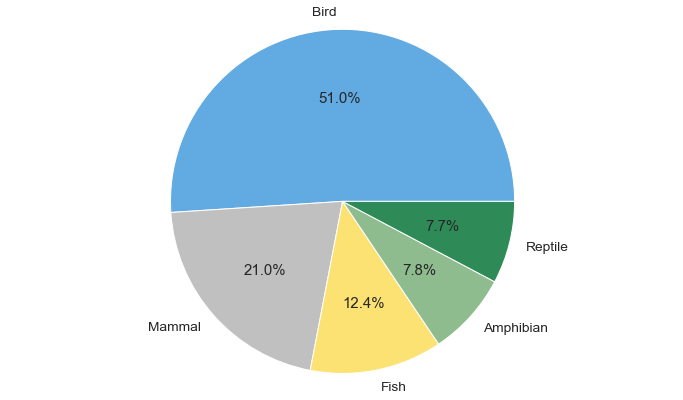

In [61]:
animal_labels = ["Bird", "Mammal", "Fish", "Amphibian", "Reptile"]
animalcounts = [521, 214, 127, 80, 79]

plt.figure(figsize =(12,7))
plt.pie(animalcounts, labels = animal_labels, autopct = "%0.1f%%", colors = ["#62abe2", "silver","#fce273", "darkseagreen", "seagreen" ])
plt.axis("equal")
plt.show()

Safe                  881
Species of Concern    113
Endangered             15
Threatened              8
In Recovery             4
Name: conservation_status, dtype: int64


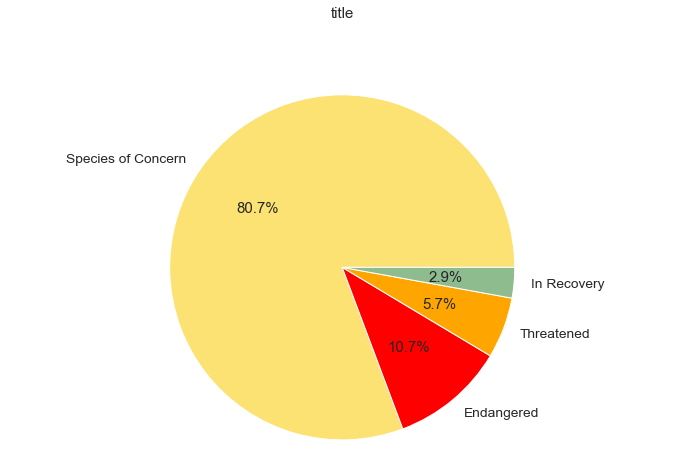

In [101]:
animals = species[(species.category != "Vascular Plant") & (species.category != "Nonvascular Plant")]

print(animals["conservation_status"].value_counts())

animal_counts = [113, 15, 8, 4]
animal_labels = ["Species of Concern", "Endangered", "Threatened", "In Recovery"]

plt.figure(figsize=(12,7))
plt.pie(animal_counts, labels = animal_labels, autopct = "%0.1f%%", colors = ["#fce273", "red", "orange", "darkseagreen"])
plt.axis("equal")
plt.title("title", pad =60)
plt.show()

In [87]:
vascular_interest = species_plants[(species_plants.category == "Vascular Plant") & (species_plants.conservation_status != "Safe")]
print(vascular.describe())
print("------------------------------------------------")
print(species["conservation_status"].value_counts())

              category   scientific_name     common_names conservation_status
count               46                46               46                  46
unique               1                46               46                   3
top     Vascular Plant  Romneya coulteri  Hairy Blueberry  Species of Concern
freq                46                 1                1                  43
------------------------------------------------
Safe                  5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64


In [81]:
#animals Bryce
print("All Bryce Animals:")
print(bryce_animals.describe())
print(bryce_animals["observations"].sum())
print("----------------------")
bryce_animals_en =bryce_animals[(bryce_animals.conservation_status == "Endangered")]
print("Endangered Bryce Animals:")
print(bryce_animals_en.describe())
print(bryce_animals_en["observations"].sum())
print("----------------------")
bryce_animals_th = bryce_animals[(bryce_animals.conservation_status == "Threatened")]
print("Threatened Bryce Animals:")
print(bryce_animals_th.describe())
print(bryce_animals_th["observations"].sum())
print("----------------------")
bryce_animals_con = bryce_animals[(bryce_animals.conservation_status == "Species of Concern")]
print("Species of Concern Bryce Animals:")
print(bryce_animals_con.describe())
print(bryce_animals_con["observations"].sum())
print("----------------------")
print("In Recovery Bryce Animals:")
bryce_animals_rec = bryce_animals[(bryce_animals.conservation_status == "In Recovery")]
print(bryce_animals_rec.describe())
print(bryce_animals_rec["observations"].sum())

All Bryce Animals:
       observations
count   1021.000000
mean      97.894221
std       22.053868
min       20.000000
25%       84.000000
50%       99.000000
75%      112.000000
max      167.000000
99950
----------------------
Endangered Bryce Animals:
       observations
count     15.000000
mean      29.000000
std       12.884099
min       20.000000
25%       23.500000
50%       27.000000
75%       29.500000
max       74.000000
435
----------------------
Threatened Bryce Animals:
       observations
count      8.000000
mean      54.125000
std       21.859535
min       37.000000
25%       41.750000
50%       49.000000
75%       55.500000
max      105.000000
433
----------------------
Species of Concern Bryce Animals:
       observations
count    113.000000
mean      91.725664
std       18.650090
min       49.000000
25%       79.000000
50%       94.000000
75%      103.000000
max      152.000000
10365
----------------------
In Recovery Bryce Animals:
       observations
count      4.000

In [82]:
#animals Smoky
print("All Smoky Animals:")
print(smoky_animals.describe())
print(smoky_animals["observations"].sum())
print("----------------------")
smoky_animals_en =smoky_animals[(smoky_animals.conservation_status == "Endangered")]
print("Endangered Smoky Animals:")
print(smoky_animals_en.describe())
print(smoky_animals_en["observations"].sum())
print("----------------------")
smoky_animals_th = smoky_animals[(smoky_animals.conservation_status == "Threatened")]
print("Threatened Smoky Animals:")
print(smoky_animals_th.describe())
print(smoky_animals_th["observations"].sum())
print("----------------------")
smoky_animals_con = smoky_animals[(smoky_animals.conservation_status == "Species of Concern")]
print("Species of Concern Smoky Animals:")
print(smoky_animals_con.describe())
print(smoky_animals_con["observations"].sum())
print("----------------------")
print("In Recovery Smoky Animals:")
smoky_animals_rec = smoky_animals[(smoky_animals.conservation_status == "In Recovery")]
print(smoky_animals_rec.describe())
print(smoky_animals_rec["observations"].sum())

All Smoky Animals:
       observations
count   1021.000000
mean      71.835455
std       21.532792
min       11.000000
25%       58.000000
50%       72.000000
75%       86.000000
max      139.000000
73344
----------------------
Endangered Smoky Animals:
       observations
count     15.000000
mean      19.533333
std        6.501282
min       11.000000
25%       14.500000
50%       18.000000
75%       24.000000
max       31.000000
293
----------------------
Threatened Smoky Animals:
       observations
count      8.000000
mean      37.250000
std       10.347532
min       18.000000
25%       33.000000
50%       37.500000
75%       44.250000
max       50.000000
298
----------------------
Species of Concern Smoky Animals:
       observations
count    113.000000
mean      62.823009
std       18.980361
min       18.000000
25%       51.000000
50%       62.000000
75%       75.000000
max      115.000000
7099
----------------------
In Recovery Smoky Animals:
       observations
count      4.0000

In [83]:
#animals Yellowstone
print("All Yellowstone Animals:")
print(yellowstone_animals.describe())
print(yellowstone_animals["observations"].sum())
print("----------------------")
yellowstone_animals_en =yellowstone_animals[(yellowstone_animals.conservation_status == "Endangered")]
print("Endangered Yellowstone Animals:")
print(yellowstone_animals_en.describe())
print(yellowstone_animals_en["observations"].sum())
print("----------------------")
yellowstone_animals_th = yellowstone_animals[(yellowstone_animals.conservation_status == "Threatened")]
print("Threatened Yellowstone Animals:")
print(yellowstone_animals_th.describe())
print(yellowstone_animals_th["observations"].sum())
print("----------------------")
yellowstone_animals_con = yellowstone_animals[(yellowstone_animals.conservation_status == "Species of Concern")]
print("Species of Concern Yellowstone Animals:")
print(yellowstone_animals_con.describe())
print(yellowstone_animals_con["observations"].sum())
print("----------------------")
print("In Recovery Yellowstone Animals:")
yellowstone_animals_rec = yellowstone_animals[(yellowstone_animals.conservation_status == "In Recovery")]
print(yellowstone_animals_rec.describe())
print(yellowstone_animals_rec["observations"].sum())

All Yellowstone Animals:
       observations
count   1021.000000
mean     242.521058
std       33.040777
min       57.000000
25%      230.000000
50%      246.000000
75%      260.000000
max      307.000000
247614
----------------------
Endangered Yellowstone Animals:
       observations
count     15.000000
mean      73.200000
std       36.135064
min       57.000000
25%       60.000000
50%       65.000000
75%       67.500000
max      203.000000
1098
----------------------
Threatened Yellowstone Animals:
       observations
count      8.000000
mean     139.000000
std       47.913613
min      109.000000
25%      113.250000
50%      120.500000
75%      141.500000
max      253.000000
1112
----------------------
Species of Concern Yellowstone Animals:
       observations
count    113.000000
mean     222.964602
std       18.833827
min      183.000000
25%      207.000000
50%      225.000000
75%      237.000000
max      266.000000
25195
----------------------
In Recovery Yellowstone Animals:
   

In [86]:
#animals Yosemite
print("All Yosemite Animals Interest:")
yosemite_animals_interest = yosemite_animals[(yosemite_animals.conservation_status != "Safe")]
print(yosemite_animals_interest.describe())
print(yosemite_animals["observations"].sum())
print("----------------------")
yosemite_animals_en =yosemite_animals[(yosemite_animals.conservation_status == "Endangered")]
print("Endangered Yosemite Animals:")
print(yosemite_animals_en.describe())
print(yosemite_animals_en["observations"].sum())
print("----------------------")
yosemite_animals_th = yosemite_animals[(yosemite_animals.conservation_status == "Threatened")]
print("Threatened Yosemite Animals:")
print(yosemite_animals_th.describe())
print(yosemite_animals_th["observations"].sum())
print("----------------------")
yosemite_animals_con = yosemite_animals[(yosemite_animals.conservation_status == "Species of Concern")]
print("Species of Concern Yosemite Animals:")
print(yosemite_animals_con.describe())
print(yosemite_animals_con["observations"].sum())
print("----------------------")
print("In Recovery Yosemite Animals:")
yosemite_animals_rec = yosemite_animals[(yosemite_animals.conservation_status == "In Recovery")]
print(yosemite_animals_rec.describe())
print(yosemite_animals_rec["observations"].sum())

All Yosemite Animals Interest:
       observations
count    140.000000
mean     119.664286
std       34.733230
min       31.000000
25%      112.000000
50%      127.000000
75%      143.000000
max      178.000000
148088
----------------------
Endangered Yosemite Animals:
       observations
count     15.000000
mean      38.866667
std        4.580497
min       31.000000
25%       35.500000
50%       39.000000
75%       42.500000
max       47.000000
583
----------------------
Threatened Yosemite Animals:
       observations
count      8.000000
mean      73.375000
std        9.006942
min       59.000000
25%       69.000000
50%       72.500000
75%       76.000000
max       87.000000
587
----------------------
Species of Concern Yosemite Animals:
       observations
count    113.000000
mean     133.451327
std       16.137241
min       99.000000
25%      121.000000
50%      133.000000
75%      144.000000
max      178.000000
15080
----------------------
In Recovery Yosemite Animals:
       obse

In [125]:
data_en = pd.concat([bryce_animals_en, smoky_animals_en, yellowstone_animals_en, yosemite_animals_en], axis = 0)
grouped_en =data_en.groupby(["scientific_name"])["observations"].sum()
print(max(grouped_en), min(grouped_en))
print(grouped_en)

488 131
scientific_name
Canis lupus                     488
Canis rufus                     137
Chasmistes liorus               146
Etheostoma percnurum            166
Glaucomys sabrinus coloratus    153
Grus americana                  131
Gymnogyps californianus         156
Myotis grisescens               160
Myotis sodalis                  145
Noturus baileyi                 143
Ovis canadensis sierrae         153
Picoides borealis               146
Rana sierrae                    144
Vermivora bachmanii             141
Name: observations, dtype: int64


In [126]:
data_th = pd.concat([bryce_animals_th, smoky_animals_th, yellowstone_animals_th, yosemite_animals_th], axis =0)
grouped_th = data_th.groupby(["scientific_name"])["observations"].sum()
print(max(grouped_th), min(grouped_th))
print(grouped_th)

456 242
scientific_name
Anaxyrus canorus                 274
Erimonax monachus                242
Myotis septentrionalis           302
Noturus flavipinnis              289
Oncorhynchus clarkii henshawi    301
Oncorhynchus mykiss              456
Rana draytonii                   290
Ursus arctos horribilis          276
Name: observations, dtype: int64
